In [450]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest,chi2,f_regression
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,cross_val_score,learning_curve,StratifiedKFold,GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_absolute_error,confusion_matrix,accuracy_score,classification_report,matthews_corrcoef
from xgboost import XGBClassifier

df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# Data cleaning,analysing and encoding

In [451]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [452]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [453]:
df['Attrition'].replace({'Yes':1,'No':0},inplace=True)

In [454]:
df.select_dtypes('object')

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
...,...,...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
1466,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,Y,No
1467,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Y,Yes
1468,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,Y,No


In [455]:
df.isna().sum().sum()

0

In [456]:
df['Gender'].replace({'Male':1,'Female':0},inplace=True)
df['OverTime'].replace({'Yes':1,'No':0},inplace=True)

29    18
31    18
33    12
35    10
19     6
41     6
39     6
21     6
37     6
25     6
23     4
27     3
47     3
55     3
43     2
45     2
49     2
51     2
53     2
Name: Age, dtype: int64


c:\users\garg's pc\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='count'>

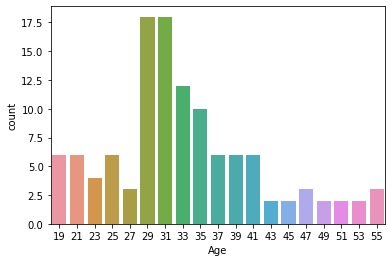

In [457]:
dt = df[df['Age'] & df['Attrition']==1]
print(dt['Age'].value_counts())
sns.countplot(dt['Age'])

### As we can see in above plot the person with middle age group (29,31,33,35) has max attrition while with higher age group like (43,45,49,51,53) has lower attrition

In [458]:
df.select_dtypes('object')

,BusinessTravel,Department,EducationField,JobRole,MaritalStatus,Over18
0,Travel_Rarely,Sales,Life Sciences,Sales Executive,Single,Y
1,Travel_Frequently,Research & Development,Life Sciences,Research Scientist,Married,Y
2,Travel_Rarely,Research & Development,Other,Laboratory Technician,Single,Y
3,Travel_Frequently,Research & Development,Life Sciences,Research Scientist,Married,Y
4,Travel_Rarely,Research & Development,Medical,Laboratory Technician,Married,Y
...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Laboratory Technician,Married,Y
1466,Travel_Rarely,Research & Development,Medical,Healthcare Representative,Married,Y
1467,Travel_Rarely,Research & Development,Life Sciences,Manufacturing Director,Married,Y
1468,Travel_Frequently,Sales,Medical,Sales Executive,Married,Y


In [459]:
if 'Over18' in df: df.drop(columns='Over18',inplace=True)
if 'EmployeeNumber' in df: df.drop(columns='EmployeeNumber',inplace=True)

c:\users\garg's pc\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='JobSatisfaction', ylabel='count'>

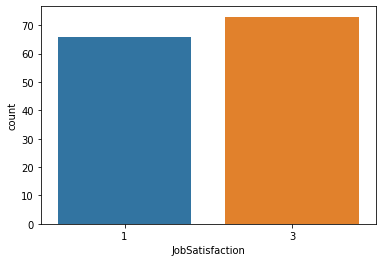

In [460]:
df['JobSatisfaction'].value_counts()
dt = df[df['JobSatisfaction'] & df['Attrition']==1]
sns.countplot(dt['JobSatisfaction'])

### We can clearly see that person with job satisfaction of (1,3) has higher attrition

In [461]:
dt_male = list(df[df['Gender'].isin([1]) & df['Attrition']==1]['Gender'].value_counts())
dt_female = list(df[df['Gender'].isin([0]) & df['Attrition']==1]['Gender'].value_counts())

print("Attrition of Female is {}% while of Male is {}%".format(round(dt_female[0]/(dt_male[0]+dt_female[0])*100,2),round(dt_male[0]/(dt_male[0]+dt_female[0])*100),2))

Attrition of Female is 36.71% while of Male is 63%


### Attrition of Male is more than of Female

c:\users\garg's pc\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

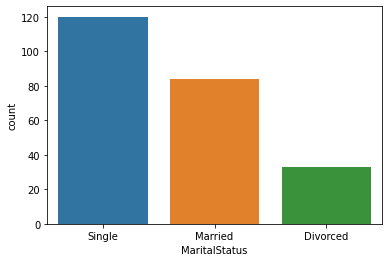

In [462]:
dt = df[df['MaritalStatus'].isin(['Married','Divorced','Single']) & df['Attrition']==1]['MaritalStatus']

sns.countplot(dt)

 ### Attrition of Single is more followed by Married and than Divorced. 

c:\users\garg's pc\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PercentSalaryHike', ylabel='count'>

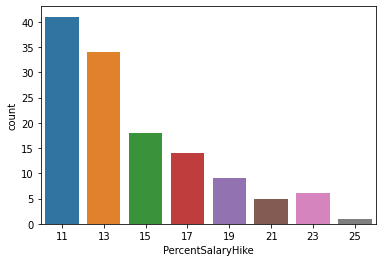

In [463]:
sns.countplot(df[df['PercentSalaryHike'] & df['Attrition']==1]['PercentSalaryHike'])

### We can clearly see that low percent of salary hike has higher attrition in compared to higher slary hikes.
### i.e., Attrition rate decreases with the higher salary hikes.

c:\users\garg's pc\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PerformanceRating', ylabel='count'>

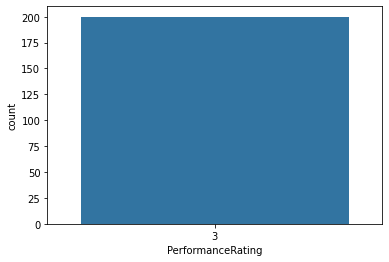

In [464]:
sns.countplot(df[df['PerformanceRating'] & df['Attrition']==1]['PerformanceRating'])

### Lower Performance Rating has higher attrition as seen above (data has only 3 & 4 performance ratings)

c:\users\garg's pc\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='YearsAtCompany', ylabel='count'>

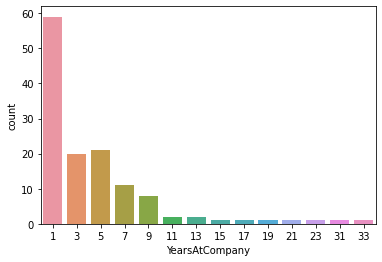

In [465]:
sns.countplot(df[df['YearsAtCompany'] & df['Attrition']==1]['YearsAtCompany'])

### New joinees with 1 yr of experience has higher attrition as shown above

In [466]:
if 'EmployeeCount' in df: df.drop(columns='EmployeeCount',inplace=True)
if 'StandardHours' in df: df.drop('StandardHours',axis=1,inplace=True)

c:\users\garg's pc\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='YearsSinceLastPromotion', ylabel='count'>

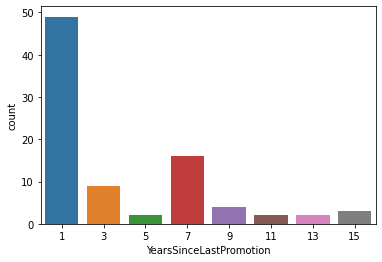

In [467]:
sns.countplot(df[df['YearsSinceLastPromotion'] & df['Attrition']==1]['YearsSinceLastPromotion'])

c:\users\garg's pc\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='NumCompaniesWorked', ylabel='count'>

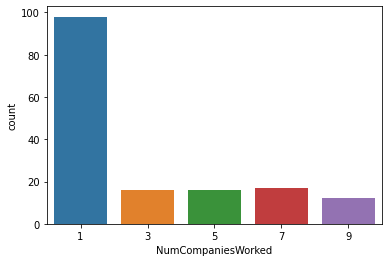

In [468]:
sns.countplot(df[df['NumCompaniesWorked'] & df['Attrition']==1]['NumCompaniesWorked'])

### Person worked for only 1 company has higher attrition as shown

c:\users\garg's pc\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TotalWorkingYears', ylabel='count'>

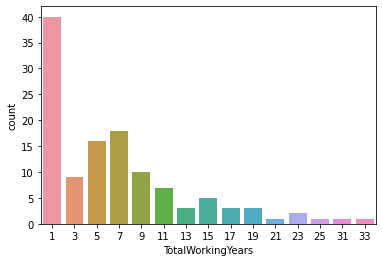

In [469]:
sns.countplot(df[df['TotalWorkingYears'] & df['Attrition']==1]['TotalWorkingYears'])

In [470]:
# fig,ax = plt.subplots(figsize=(13,7))
# sns.countplot(df[df['MonthlyIncome'] & df['Attrition']==1]['MonthlyIncome'])
dt = pd.DataFrame(df[df['MonthlyIncome'] & df['Attrition']==1]['MonthlyIncome'].value_counts())
dt.sort_values(by='MonthlyIncome',ascending=False)

,MonthlyIncome
2293,2
2335,1
5381,1
1601,1
2313,1
...,...
4599,1
4787,1
3441,1
2759,1


c:\users\garg's pc\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='EnvironmentSatisfaction', ylabel='count'>

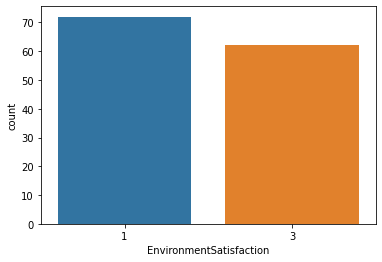

In [471]:
sns.countplot(df[df['EnvironmentSatisfaction'] & df['Attrition']==1]['EnvironmentSatisfaction'])

### Less environment satisfaction have more attritions

c:\users\garg's pc\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='JobSatisfaction', ylabel='count'>

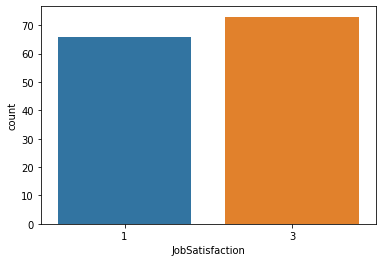

In [472]:
sns.countplot(df[df['JobSatisfaction'] & df['Attrition']==1]['JobSatisfaction'])

### Attrition count Vs. Job Satisfaction (ratings)

c:\users\garg's pc\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='OverTime', ylabel='count'>

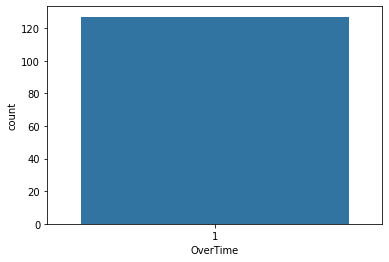

In [473]:
sns.countplot(df[df['OverTime'] & df['Attrition']==1]['OverTime'])

### OverTime worker's has more attrition

In [474]:
df.select_dtypes('object')

,BusinessTravel,Department,EducationField,JobRole,MaritalStatus
0,Travel_Rarely,Sales,Life Sciences,Sales Executive,Single
1,Travel_Frequently,Research & Development,Life Sciences,Research Scientist,Married
2,Travel_Rarely,Research & Development,Other,Laboratory Technician,Single
3,Travel_Frequently,Research & Development,Life Sciences,Research Scientist,Married
4,Travel_Rarely,Research & Development,Medical,Laboratory Technician,Married
...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Laboratory Technician,Married
1466,Travel_Rarely,Research & Development,Medical,Healthcare Representative,Married
1467,Travel_Rarely,Research & Development,Life Sciences,Manufacturing Director,Married
1468,Travel_Frequently,Sales,Medical,Sales Executive,Married


# Encding Features

In [475]:
def one_hot_encoder(df,columns,prefixes):
    df = df.copy()
    for column,prefix in zip(columns,prefixes):
        dummies = pd.get_dummies(df[column],prefix=prefix)
        df = pd.concat([df,dummies],axis=1)
        df = df.drop(column,axis=1)
    return df

def binary_encoder(df,columns,bins):
    df = df.copy()
    for column,binn in zip(columns,bins):
        df[column] = df[column].apply(lambda x: 1 if x==binn else 0)
    return df    

In [476]:
nominal_features = ['BusinessTravel','Department','EducationField','JobRole','MaritalStatus']
prefixes = ['b','d','e','j','m']

if 'BusinessTravel' in df: df = one_hot_encoder(df,nominal_features,prefixes)

In [477]:
print("Null values in data is: {}".format(df.isna().sum().sum()))

Null values in data is: 0


# Split / Scale & Features Selection

In [478]:
y = df['Attrition']
# cols = [x for x in df.columns if x!= 'Attrition']
X = df.drop(columns=['Attrition'])


scale = StandardScaler()

In [479]:
print('Percentage of Yes is {}% and No is {}%'.format(round(sum(y==1)/len(y)*100,2),round(sum(y==0)/len(y)*100,2)))

Percentage of Yes is 16.12% and No is 83.88%


### Data is unbalanced

In [480]:
trainX,testX,trainY,testY = train_test_split(X,y,random_state=32,test_size=0.20,stratify=y)


In [481]:
# sm = SMOTE(random_state=2)
# trainX,trainY = sm.fit_sample(trainX,trainY.ravel())

In [482]:
trainX = scale.fit_transform(trainX)
testX = scale.fit_transform(testX)

In [483]:
best_feature = SelectKBest().fit(trainX,trainY)
scores = pd.DataFrame(best_feature.scores_)
columns = pd.DataFrame(X.columns)
best_features = pd.concat([columns,scores],axis=1)
best_features.columns = ['Feature','Score']
best_features = best_features.sort_values(by='Score',ascending=False)
best_features

,Feature,Score
13,OverTime,102.511341
48,m_Single,41.446669
8,JobLevel,37.103404
10,MonthlyIncome,34.118000
18,TotalWorkingYears,33.010236
45,j_Sales Representative,32.954473
24,YearsWithCurrManager,30.939034
22,YearsInCurrentRole,30.627561
0,Age,29.205198
17,StockOptionLevel,28.294342


In [484]:
yes = len(df[df['Attrition']==1])
no = len(df[df['Attrition']==0])
print("Percent of Yes: {}% and No: {}%".format(round(yes/(yes+no)*100,2),round(no/(yes+no)*100,2)))

Percent of Yes: 16.12% and No: 83.88%


# Applying Learning Algorithms

In [494]:
model_acc_scores = {}
def predictionResult(testY,pred,model):
    conf_mat = confusion_matrix(testY,pred)
    correct = conf_mat[0,0]+conf_mat[1,1]
    wrong = conf_mat.sum() - correct
    mae = mean_absolute_error(testY,pred)
    acc_score = accuracy_score(testY,pred)
    mat_corrcoef = matthews_corrcoef(testY,pred)
    model_acc_scores[model] = {'correct':correct,'wrong':wrong,'mae':mae,
                               'accuracy_score':acc_score,'matthews_corrcoef':mat_corrcoef}
    print("{} {} {}".format("-"*20,model,"-"*20))
    print("Model predicted {} correct and {} wrong".format(correct,wrong))
    print("Mean Absolute Error is: {}".format(round(mae*100,2)))
    print("Accuracy Score is: {}%".format(round(acc_score*100,2)))
    print("Matthews Corrcoefficient is: {}".format(matthews_corrcoef(testY,pred)))
    print(classification_report(testY,pred))
    sns.heatmap(confusion_matrix(testY,pred),annot=True)

-------------------- LogisticRegression --------------------
Model predicted 256 correct and 38 wrong
Mean Absolute Error is: 12.93
Accuracy Score is: 87.07%
Matthews Corrcoefficient is: 0.4397593825810053
              precision    recall  f1-score   support

           0       0.89      0.96      0.93       247
           1       0.67      0.38      0.49        47

    accuracy                           0.87       294
   macro avg       0.78      0.67      0.71       294
weighted avg       0.86      0.87      0.86       294



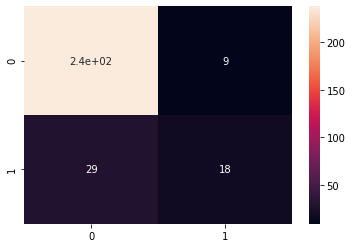

In [495]:
model = LogisticRegression()
# cv_score = cross_val_score(model,trainX,trainY,cv=7)
# print(cv_score)
model.fit(trainX,trainY)

pred = model.predict(testX)
predictionResult(testY,pred,'LogisticRegression')

In [496]:
# #Tunning SVC
# params = {'C':[0.1,1,10],
#         'gamma':[0.0001,0.001,0.1,1],'kernel':['linear']}
# grid = RandomizedSearchCV(SVC(),params,refit=True,random_state=2)
# grid.fit(trainX,trainY)
# print(grid.best_params_)
# print(grid.best_score_)

-------------------- LinearSVC --------------------
Model predicted 261 correct and 33 wrong
Mean Absolute Error is: 11.22
Accuracy Score is: 88.78%
Matthews Corrcoefficient is: 0.522444631549069
              precision    recall  f1-score   support

           0       0.90      0.97      0.94       247
           1       0.75      0.45      0.56        47

    accuracy                           0.89       294
   macro avg       0.83      0.71      0.75       294
weighted avg       0.88      0.89      0.88       294



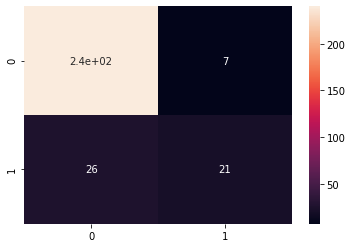

In [497]:
model = SVC(kernel='linear',gamma=0.009,random_state=0)
model.fit(trainX,trainY)

pred = model.predict(testX)
predictionResult(testY,pred,'LinearSVC')

In [498]:
# # #Tunning XGBClassifier
# params = {'max_depth':[3,4,5,6,7,8],
#         'gamma':[0.0001,0.001,0.1,1],'learning_rate':[0.001,0.1,1,10]}
# grid = GridSearchCV(XGBClassifier(use_label_encoder=False,eval_metric='logloss'),params,refit=True)
# grid.fit(trainX,trainY)
# print(grid.best_params_)
# print(grid.best_score_)

[0.92261905 0.88690476 0.91071429 0.83928571 0.88095238 0.83333333
 0.88095238]
-------------------- XGBClassifier --------------------
Model predicted 256 correct and 38 wrong
Mean Absolute Error is: 12.93
Accuracy Score is: 87.07%
Matthews Corrcoefficient is: 0.4397593825810053
              precision    recall  f1-score   support

           0       0.89      0.96      0.93       247
           1       0.67      0.38      0.49        47

    accuracy                           0.87       294
   macro avg       0.78      0.67      0.71       294
weighted avg       0.86      0.87      0.86       294



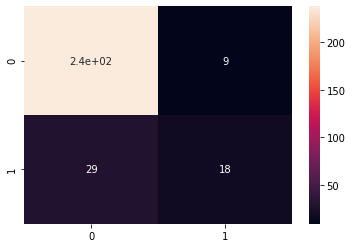

In [499]:
model = XGBClassifier(use_label_encoder=False,eval_metric='logloss',learning_rate=1.7,booster='gblinear',reg_alpha=0.001,reg_lambda=0.001)
cv_score = cross_val_score(model,trainX,trainY,cv=7)
print(cv_score)
model.fit(trainX,trainY)

pred = model.predict(testX)
predictionResult(testY,pred,'XGBClassifier')

In [516]:
# # #Tunning KNeighborsClassifier
params = {'n_neighbors':[x for x in range(1,22)]}
grid = GridSearchCV(KNeighborsClassifier(),params)
grid.fit(trainX,trainY)
print(grid.best_params_)
print(grid.best_score_)

{'n_neighbors': 11}
0.8554489722322394


[0.85119048 0.8452381  0.86309524 0.85714286 0.85119048 0.83928571
 0.85714286]
-------------------- KNeighborsClassifier --------------------
Model predicted 247 correct and 47 wrong
Mean Absolute Error is: 15.99
Accuracy Score is: 84.01%
Matthews Corrcoefficient is: 0.10900178027248923
              precision    recall  f1-score   support

           0       0.84      0.99      0.91       247
           1       0.50      0.04      0.08        47

    accuracy                           0.84       294
   macro avg       0.67      0.52      0.50       294
weighted avg       0.79      0.84      0.78       294



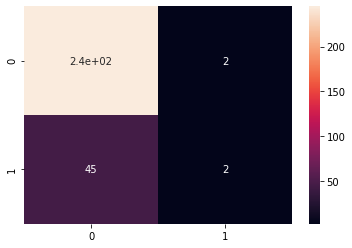

In [515]:
model = KNeighborsClassifier(n_neighbors=11)
cv_score = cross_val_score(model,trainX,trainY,cv=7)
print(cv_score)
model.fit(trainX,trainY)

pred = model.predict(testX)
predictionResult(testY,pred,'KNeighborsClassifier')

In [517]:
res = pd.DataFrame(model_acc_scores)
res

,LogisticRegression,LinearSVC,XGBClassifier,KNeighborsClassifier
correct,256.000000,261.000000,256.000000,247.000000
wrong,38.000000,33.000000,38.000000,47.000000
mae,0.129252,0.112245,0.129252,0.159864
accuracy_score,0.870748,0.887755,0.870748,0.840136
matthews_corrcoef,0.439759,0.522445,0.439759,0.109002


## Here matthews corrcoef of LinearSVC is high (0.52) and also accuracy score is 88.78% which is highest amongst all. So, LinearSVC is the best model for this dataset.